<a href="https://colab.research.google.com/github/Husayn01/Academic-Research/blob/main/Starter_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/My Drive/Academic_Research/Data/train.csv', sep=';')

In [7]:
data.shape

(1170511, 29)

In [4]:
data.head(5)

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-13,494.528,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0
1,15/9-13,494.680,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0
2,15/9-13,494.832,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0
3,15/9-13,494.984,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0
4,15/9-13,495.136,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170511 entries, 0 to 1170510
Data columns (total 29 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   WELL                               1170511 non-null  object 
 1   DEPTH_MD                           1170511 non-null  float64
 2   X_LOC                              1159736 non-null  float64
 3   Y_LOC                              1159736 non-null  float64
 4   Z_LOC                              1159736 non-null  float64
 5   GROUP                              1169233 non-null  object 
 6   FORMATION                          1033517 non-null  object 
 7   CALI                               1082634 non-null  float64
 8   RSHA                               630650 non-null   float64
 9   RMED                               1131518 non-null  float64
 10  RDEP                               1159496 non-null  float64
 11  RHOB                    

In [27]:
data.describe()

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
count,1.170511e+06,1.159736e+06,1.159736e+06,1.159736e+06,1.082634e+06,630650.000000,1.131518e+06,1.159496e+06,1.009242e+06,1.170511e+06,...,535071.000000,174613.000000,298833.000000,987857.000000,316151.000000,176160.000000,192325.000000,327427.000000,1.170511e+06,1.170332e+06
mean,2.184087e+03,4.856310e+05,6.681276e+06,-2.138527e+03,1.318568e+01,10.694664,4.986978e+00,1.069103e+01,2.284987e+00,7.091370e+01,...,137.367965,204.655019,1.223849,0.012196,1.216329,7.796809,23.505069,-95.779496,6.138598e+04,1.164258e+00
std,9.971821e+02,3.455641e+04,1.281524e+05,9.709426e+02,3.798907e+00,100.642597,5.467269e+01,1.139480e+02,2.532835e-01,3.423149e+01,...,1539.383558,71.068461,54.372859,7.477798,10.180834,89.741807,22.632800,348.980030,1.389170e+04,4.451180e-01
min,1.360860e+02,4.268988e+05,6.406641e+06,-5.395563e+03,2.344000e+00,0.000100,-8.418695e-03,3.170056e-02,7.209712e-01,1.092843e-01,...,-0.117977,69.163177,-12.215459,-7429.338867,0.125818,0.056586,-999.250122,-999.900024,3.000000e+04,1.000000e+00
25%,1.418597e+03,4.547996e+05,6.591327e+06,-2.811502e+03,9.429712e+00,0.854120,9.140862e-01,9.102396e-01,2.092203e+00,4.762722e+01,...,5.628000,155.936707,0.148438,-0.009253,0.143792,0.891272,11.281895,0.687681,6.500000e+04,1.000000e+00
50%,2.076605e+03,4.769203e+05,6.737311e+06,-2.042785e+03,1.255575e+01,1.399020,1.443584e+00,1.439000e+00,2.321228e+00,6.836763e+01,...,17.799999,188.200653,0.557320,0.001752,0.155774,1.967156,20.131153,1.366672,6.500000e+04,1.000000e+00
75%,2.864393e+03,5.201532e+05,6.784886e+06,-1.391866e+03,1.671075e+01,3.099348,2.680930e+00,2.557220e+00,2.488580e+00,8.903551e+01,...,34.812794,224.645081,1.299655,0.021702,1.168307,5.084564,31.138481,3.420790,6.500000e+04,1.000000e+00
max,5.436632e+03,5.726328e+05,6.856661e+06,-1.110860e+02,2.827900e+01,2193.904541,1.988616e+03,1.999887e+03,3.457820e+00,1.076964e+03,...,47015.125000,676.578125,10011.422852,2.836938,185.730927,10000.000000,742.797852,35930.671875,9.900000e+04,3.000000e+00


The data contains the metadata columns
* WELL: well name
* DEPTH_MD: measured depth
* X_LOC: UTM X coordinate
* Y_LOC: UTM Y coordinate
* Z_LOC: DEPTH
* GROUP: NPD lithostratigraphy group
* FORMATION: NPD lithostratgraphy formation

The data contains the well log curves. For example the following:
* BS: Bit Size
* CALI: Caliper
* RDEP: Deep Resistivity
* RHOB: Bulk Density
* GR: Raw gamma data
* SGR: Spectral Gamma Ray
* RMED: Medium Resistivity
* ROP: Rate of Penetration
* NPHI: Neutron Porosity
* PEF: Photoelectric Absorption Factor
* RSHA: Shallow Resistivity
* DTS: Sonic (Sheer Slowness)
* DTC: Sonic (Compressional Slowness)

See contest page for full list.

as well as the interpretation

* FORCE_2020_LITHOFACIES_LITHOLOGY: lithology class label
* FORCE_2020_LITHOFACIES_CONFIDENCE: confidence in lithology interpretation (1: high, 2: medium, 3: low)

There is a total of 83 wells in the training dataset. The `WELL` column is included so the data can be separated per well. This will be necessary for any "windowed" approaches where we use non-local information in the ML features.

In [6]:
wells = data['WELL'].unique()
wells

array(['15/9-13', '15/9-15', '15/9-17', '16/1-2', '16/1-6 A', '16/10-1',
       '16/10-2', '16/10-3', '16/10-5', '16/11-1 ST3', '16/2-11 A',
       '16/2-16', '16/2-6', '16/4-1', '16/5-3', '16/7-4', '16/7-5',
       '16/8-1', '17/11-1', '25/11-15', '25/11-19 S', '25/11-5',
       '25/2-13 T4', '25/2-14', '25/2-7', '25/3-1', '25/4-5', '25/5-1',
       '25/5-4', '25/6-1', '25/6-2', '25/6-3', '25/7-2', '25/8-5 S',
       '25/8-7', '25/9-1', '26/4-1', '29/6-1', '30/3-3', '30/3-5 S',
       '30/6-5', '31/2-1', '31/2-19 S', '31/2-7', '31/2-8', '31/2-9',
       '31/3-1', '31/3-2', '31/3-3', '31/3-4', '31/4-10', '31/4-5',
       '31/5-4 S', '31/6-5', '31/6-8', '32/2-1', '33/5-2', '33/6-3 S',
       '33/9-1', '33/9-17', '34/10-19', '34/10-21', '34/10-33',
       '34/10-35', '34/11-1', '34/11-2 S', '34/12-1', '34/2-4',
       '34/3-1 A', '34/4-10 R', '34/5-1 A', '34/5-1 S', '34/7-13',
       '34/7-20', '34/7-21', '34/8-1', '34/8-3', '34/8-7 R', '35/11-1',
       '35/11-10', '35/11-11', '35/11-12

In [8]:
len(wells)

98

The LITHOLOGY column contains the interpretation. Each number corresponds to a lithology class, given by the following list:

In [9]:
lithology_keys = {30000: 'Sandstone',
                 65030: 'Sandstone/Shale',
                 65000: 'Shale',
                 80000: 'Marl',
                 74000: 'Dolomite',
                 70000: 'Limestone',
                 70032: 'Chalk',
                 88000: 'Halite',
                 86000: 'Anhydrite',
                 99000: 'Tuff',
                 90000: 'Coal',
                 93000: 'Basement'}

In [10]:
data['FORCE_2020_LITHOFACIES_LITHOLOGY'].unique()

array([65000, 30000, 65030, 70000, 99000, 80000, 86000, 74000, 70032,
       90000, 88000, 93000])

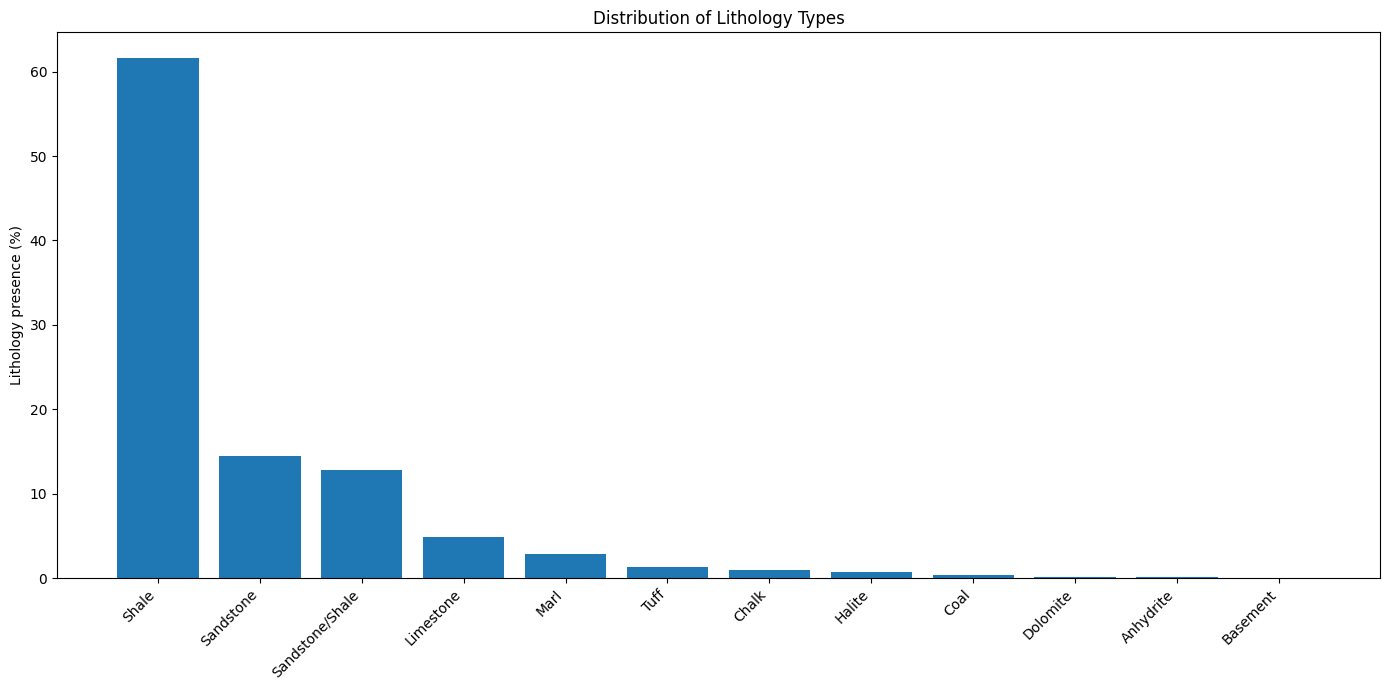

In [13]:
counts = data['FORCE_2020_LITHOFACIES_LITHOLOGY'].value_counts()
names = []
percentage = []
N = data['FORCE_2020_LITHOFACIES_LITHOLOGY'].shape[0]

# Use .items() instead of deprecated .iteritems()
for item in counts.items():
    names.append(lithology_keys[item[0]])
    percentage.append(float(item[1])/N*100)

fig, ax = plt.subplots(1, 1, figsize=(14, 7))
x_positions = np.arange(len(names))

# Create the bar chart
ax.bar(x=x_positions, height=percentage)

# Set tick positions first, then labels
ax.set_xticks(x_positions)
ax.set_xticklabels(names, rotation=45, ha='right')  # ha='right' for better alignment
ax.set_ylabel('Lithology presence (%)')

# Optional: Add some styling improvements
ax.set_title('Distribution of Lithology Types')
plt.tight_layout()  # Prevents label cutoff
plt.show()

Notice that some of the curves are NaN. This is an imporant aspect of this dataset and of this competition. The only log columns that are guaranteed to be present are WELL, DEPT, and GR. All other logs can (and will) be missing from some parts of the dataset.

In [17]:
# Calculate missing values count and percentage
missing_count = data.isna().sum()
total_rows = len(data)
missing_percentage = (missing_count / total_rows) * 100

# Create a summary DataFrame
missing_summary = pd.DataFrame({
    'Missing_Count': missing_count,
    'Missing_Percentage': missing_percentage
})

# Filter to show only columns with missing values
missing_summary = missing_summary[missing_summary['Missing_Count'] > 0]

# Sort by percentage of missing values (descending)
missing_summary = missing_summary.sort_values('Missing_Percentage', ascending=False)

print("Missing Values Summary:")
print("=" * 50)
print(f"Total rows in dataset: {total_rows}")
print("\nColumns with missing values:")
print(missing_summary.round(2))

Missing Values Summary:
Total rows in dataset: 1170511

Columns with missing values:
                                   Missing_Count  Missing_Percentage
SGR                                      1101158               94.07
DTS                                       995898               85.08
RMIC                                      994351               84.95
ROPA                                      978186               83.57
DCAL                                      871678               74.47
MUDWEIGHT                                 854360               72.99
RXO                                       843084               72.03
ROP                                       635440               54.29
RSHA                                      539861               46.12
PEF                                       498819               42.62
BS                                        487854               41.68
NPHI                                      405102               34.61
SP                

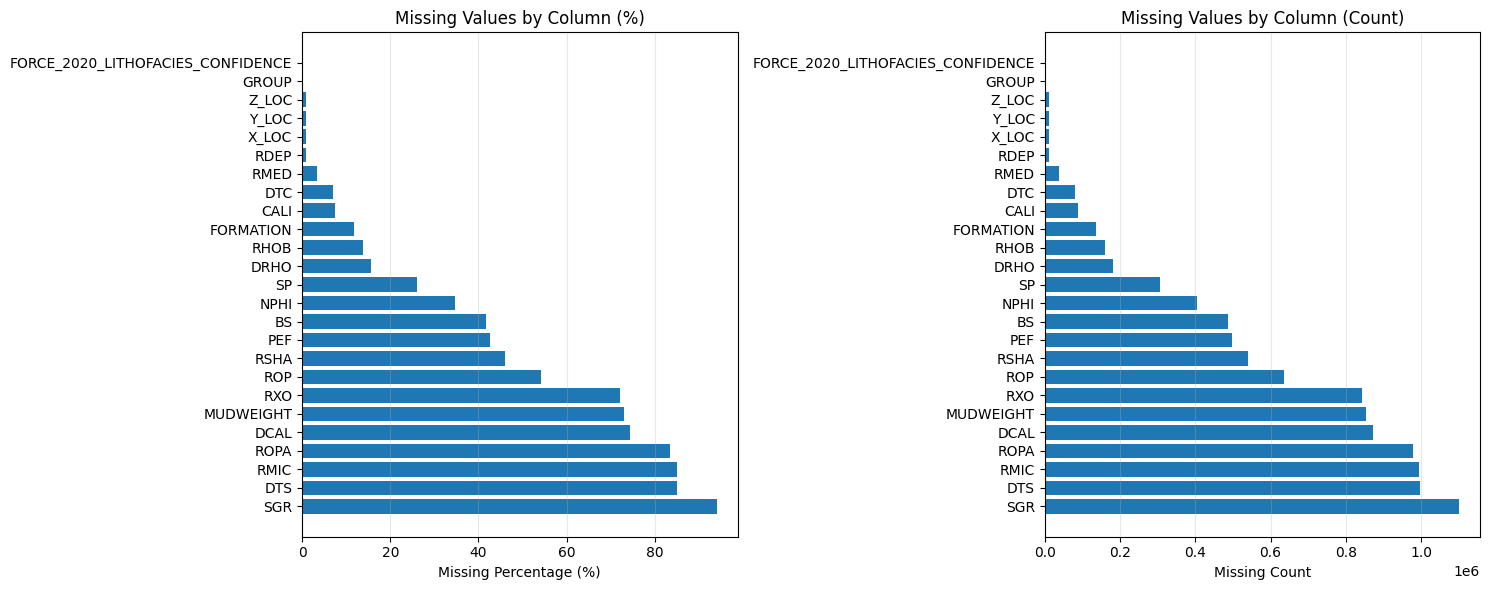

In [18]:
# Optional: Create a visualization
if len(missing_summary) > 0:
    import matplotlib.pyplot as plt

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Bar plot of missing percentages
    ax1.barh(range(len(missing_summary)), missing_summary['Missing_Percentage'])
    ax1.set_yticks(range(len(missing_summary)))
    ax1.set_yticklabels(missing_summary.index, fontsize=10)
    ax1.set_xlabel('Missing Percentage (%)')
    ax1.set_title('Missing Values by Column (%)')
    ax1.grid(axis='x', alpha=0.3)

    # Bar plot of missing counts
    ax2.barh(range(len(missing_summary)), missing_summary['Missing_Count'])
    ax2.set_yticks(range(len(missing_summary)))
    ax2.set_yticklabels(missing_summary.index, fontsize=10)
    ax2.set_xlabel('Missing Count')
    ax2.set_title('Missing Values by Column (Count)')
    ax2.grid(axis='x', alpha=0.3)

    plt.tight_layout()
    plt.show()
else:
    print("\nNo missing values found in the dataset!")

The following plot shows how large a percentage of training data wells contain at least some depth interval with the given logs. As you can see a couple of logs like RT and DTS are present in less than half of the training wells. **Remember, the test data will have a similar distribution of available logs**

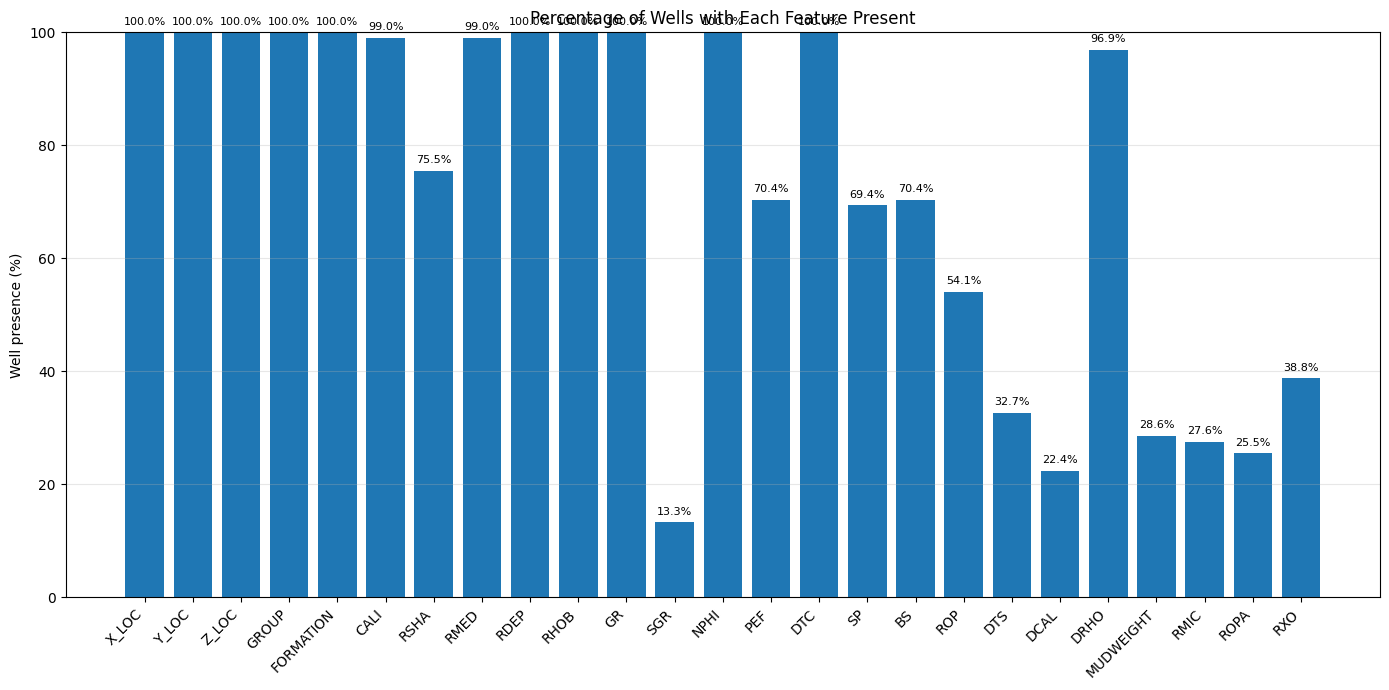

Well Presence Summary:
Total number of wells: 98
Number of features analyzed: 25

Feature presence across wells:
X_LOC: 100.0% of wells
Y_LOC: 100.0% of wells
Z_LOC: 100.0% of wells
GROUP: 100.0% of wells
FORMATION: 100.0% of wells
CALI: 99.0% of wells
RSHA: 75.5% of wells
RMED: 99.0% of wells
RDEP: 100.0% of wells
RHOB: 100.0% of wells
GR: 100.0% of wells
SGR: 13.3% of wells
NPHI: 100.0% of wells
PEF: 70.4% of wells
DTC: 100.0% of wells
SP: 69.4% of wells
BS: 70.4% of wells
ROP: 54.1% of wells
DTS: 32.7% of wells
DCAL: 22.4% of wells
DRHO: 96.9% of wells
MUDWEIGHT: 28.6% of wells
RMIC: 27.6% of wells
ROPA: 25.5% of wells
RXO: 38.8% of wells


In [19]:
# Initialize array to count occurrences of completely missing features per well
num_features = len(data.columns[2:-2])  # Dynamic sizing based on actual columns
occurrences = np.zeros(num_features)

# Count how many wells have each feature completely missing
for well in data['WELL'].unique():
    well_data = data[data['WELL'] == well]
    # Check which features are completely missing (all NaN) in this well
    completely_missing = well_data.iloc[:, 2:-2].isna().all().astype(int).values
    occurrences += completely_missing

# Calculate total number of wells
total_wells = data['WELL'].nunique()

# Calculate percentage of wells that HAVE the feature (not missing)
well_presence_percentage = (total_wells - occurrences) / total_wells * 100.0

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
x_positions = np.arange(len(well_presence_percentage))

# Create bar chart
ax.bar(x=x_positions, height=well_presence_percentage)

# Set labels and ticks
ax.set_xticks(x_positions)
ax.set_xticklabels(data.columns[2:-2], rotation=45, ha='right')
ax.set_ylabel('Well presence (%)')
ax.set_title('Percentage of Wells with Each Feature Present')

# Add some styling
ax.grid(axis='y', alpha=0.3)
ax.set_ylim(0, 100)

# Add value labels on bars (optional)
for i, v in enumerate(well_presence_percentage):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

# Print summary statistics
print("Well Presence Summary:")
print("=" * 50)
print(f"Total number of wells: {total_wells}")
print(f"Number of features analyzed: {num_features}")
print("\nFeature presence across wells:")
for i, col in enumerate(data.columns[2:-2]):
    print(f"{col}: {well_presence_percentage[i]:.1f}% of wells")

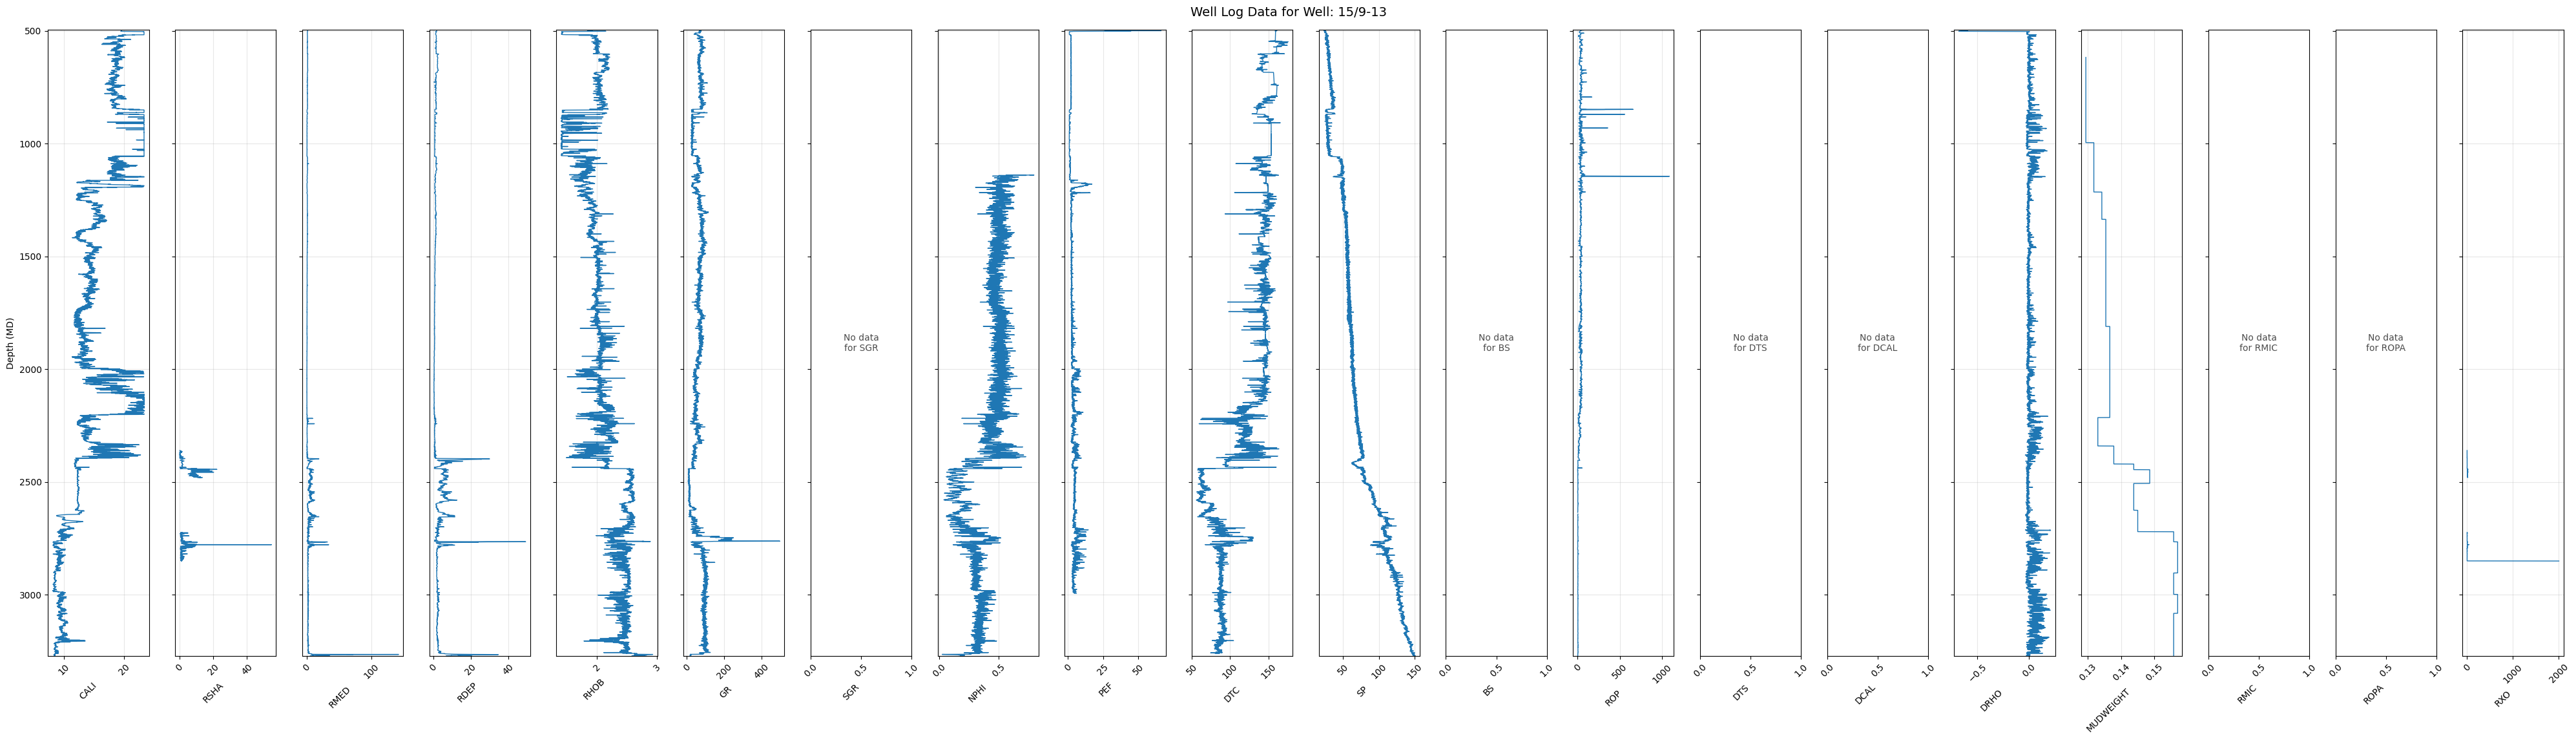

Well: 15/9-13
Depth range: 494.5 - 3272.0
Number of data points: 18270
Available parameters: 20
Parameters plotted: CALI, RSHA, RMED, RDEP, RHOB, GR, SGR, NPHI, PEF, DTC, SP, BS, ROP, DTS, DCAL, DRHO, MUDWEIGHT, RMIC, ROPA, RXO


(<Figure size 4000x1200 with 20 Axes>,
 array([<Axes: xlabel='CALI', ylabel='Depth (MD)'>, <Axes: xlabel='RSHA'>,
        <Axes: xlabel='RMED'>, <Axes: xlabel='RDEP'>,
        <Axes: xlabel='RHOB'>, <Axes: xlabel='GR'>, <Axes: xlabel='SGR'>,
        <Axes: xlabel='NPHI'>, <Axes: xlabel='PEF'>, <Axes: xlabel='DTC'>,
        <Axes: xlabel='SP'>, <Axes: xlabel='BS'>, <Axes: xlabel='ROP'>,
        <Axes: xlabel='DTS'>, <Axes: xlabel='DCAL'>, <Axes: xlabel='DRHO'>,
        <Axes: xlabel='MUDWEIGHT'>, <Axes: xlabel='RMIC'>,
        <Axes: xlabel='ROPA'>, <Axes: xlabel='RXO'>], dtype=object))

In [22]:
def plot_well_logs(data, well_name, figsize=(14, 10)):
    """
    Plot well log data for a specific well.

    Parameters:
    -----------
    data : pandas.DataFrame
        The main dataset containing well data
    well_name : str
        Name of the well to plot
    figsize : tuple, optional
        Figure size (width, height). Default is (14, 10)

    Returns:
    --------
    fig, axs : matplotlib figure and axes objects
    """

    # Check if well exists in data
    if well_name not in data['WELL'].values:
        print(f"Error: Well '{well_name}' not found in dataset.")
        available_wells = data['WELL'].unique()
        print(f"Available wells: {', '.join(available_wells[:10])}...")
        return None, None

    # Select well data
    well_data = data[data['WELL'] == well_name]

    # Define columns to exclude from plotting
    excluded_columns = ['DEPTH_MD', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
                       'FORCE_2020_LITHOFACIES_CONFIDENCE', 'WELL', 'GROUP', 'FORMATION',
                       'X_LOC', 'Y_LOC', 'Z_LOC']

    # Get columns to plot (maintaining order)
    plot_columns = [col for col in well_data.columns if col not in excluded_columns]
    num_plots = len(plot_columns)

    if num_plots == 0:
        print(f"No plottable columns found for well '{well_name}'")
        return None, None

    # Create subplots - handle case where there might be only one column
    if num_plots == 1:
        fig, axs = plt.subplots(1, 1, figsize=(6, figsize[1]))
        axs = [axs]  # Make it iterable
    else:
        fig, axs = plt.subplots(1, num_plots, figsize=(max(figsize[0], num_plots*2), figsize[1]), sharey=True)

    # Create plots for each column
    for ic, col in enumerate(plot_columns):
        # Skip columns that are entirely NaN
        if well_data[col].isna().all():
            axs[ic].text(0.5, 0.5, f'No data\nfor {col}', ha='center', va='center',
                         transform=axs[ic].transAxes, fontsize=10, alpha=0.7)
            axs[ic].set_xlabel(col, rotation=45, ha='right')
            continue

        # Plot the well log curve
        axs[ic].plot(well_data[col], well_data['DEPTH_MD'], linewidth=1)
        axs[ic].set_xlabel(col, rotation=45, ha='right')
        axs[ic].grid(True, alpha=0.3)

        # Remove NaN values for better axis scaling
        valid_data = well_data[col].dropna()
        if not valid_data.empty:
            # Set reasonable x-axis limits
            data_range = valid_data.max() - valid_data.min()
            if data_range > 0:
                margin = data_range * 0.05
                axs[ic].set_xlim(valid_data.min() - margin, valid_data.max() + margin)

    # Set depth axis properties (inverted, like typical well logs)
    depth_min = well_data['DEPTH_MD'].min()
    depth_max = well_data['DEPTH_MD'].max()

    for ax in axs:
        ax.set_ylim(depth_max, depth_min)  # Inverted y-axis (depth increases downward)
        ax.tick_params(axis='x', rotation=45)

    # Set y-label only on the first subplot
    axs[0].set_ylabel('Depth (MD)')

    # Add title
    fig.suptitle(f'Well Log Data for Well: {well_name}', fontsize=14, y=0.95)

    # Adjust layout
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)  # Make room for title
    plt.show()

    # Print summary information
    print(f"Well: {well_name}")
    print(f"Depth range: {depth_min:.1f} - {depth_max:.1f}")
    print(f"Number of data points: {len(well_data)}")
    print(f"Available parameters: {len(plot_columns)}")
    print("Parameters plotted:", ', '.join(plot_columns))

    return fig, axs


# Example usage:
# plot_well_logs(data, wells[0])
# plot_well_logs(data, 'WELL_NAME_HERE')
plot_well_logs(data, wells[0], figsize=(16, 12))

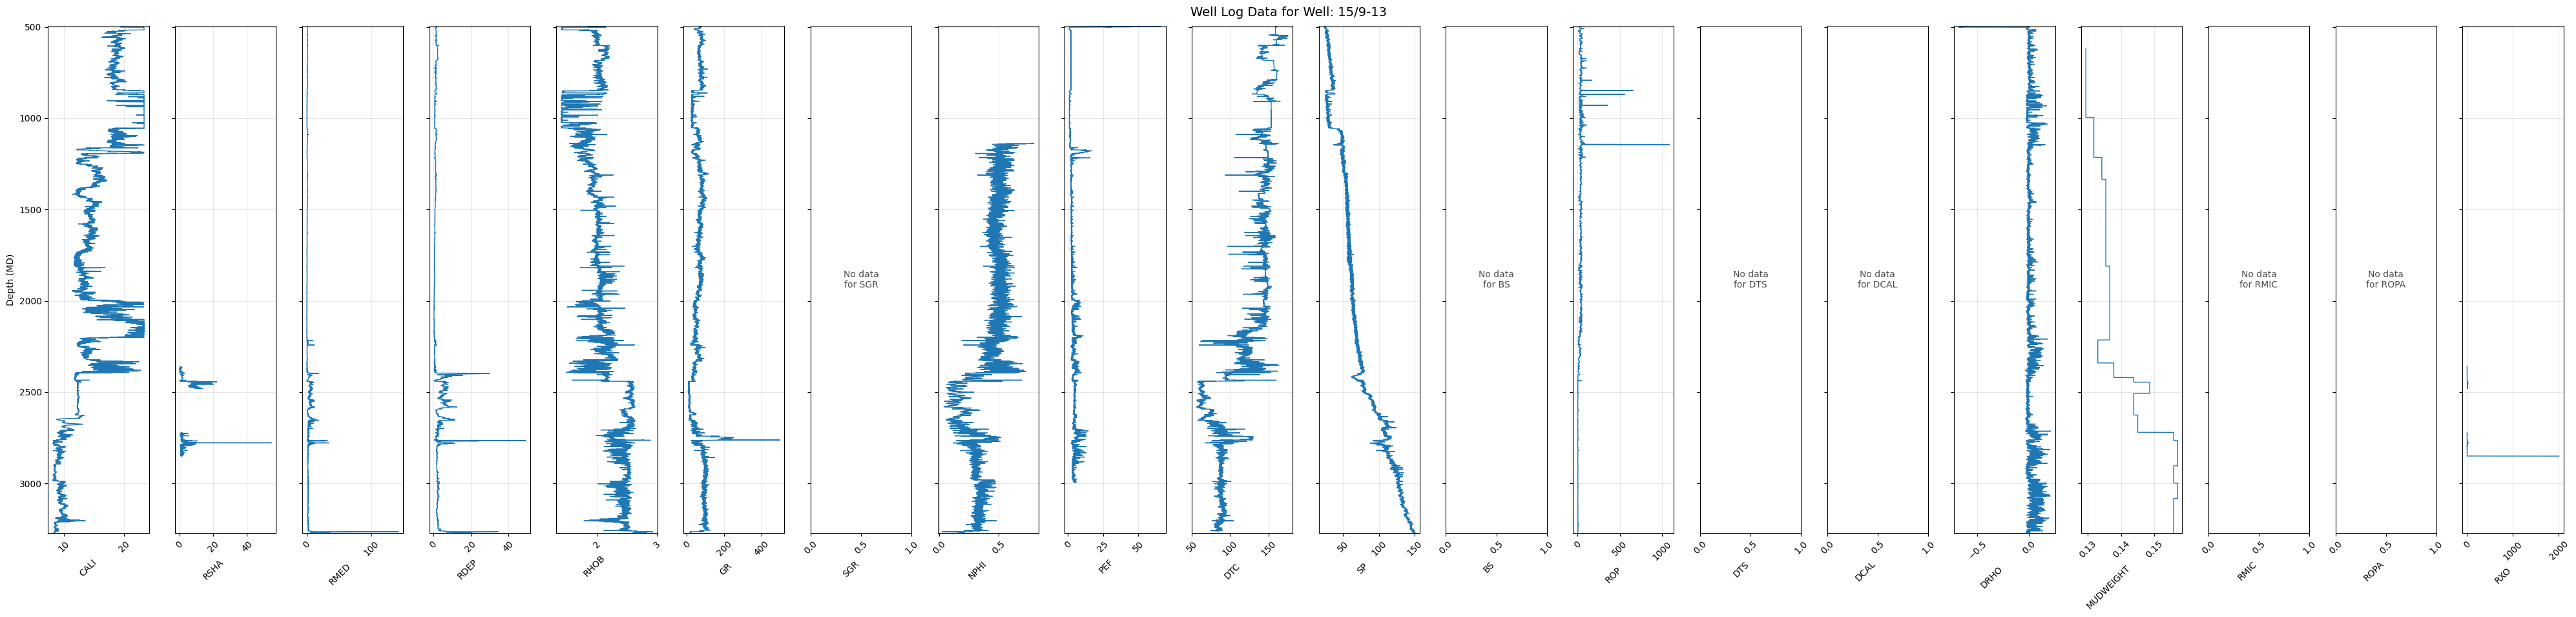

Well: 15/9-13
Depth range: 494.5 - 3272.0
Number of data points: 18270
Available parameters: 20
Parameters plotted: CALI, RSHA, RMED, RDEP, RHOB, GR, SGR, NPHI, PEF, DTC, SP, BS, ROP, DTS, DCAL, DRHO, MUDWEIGHT, RMIC, ROPA, RXO


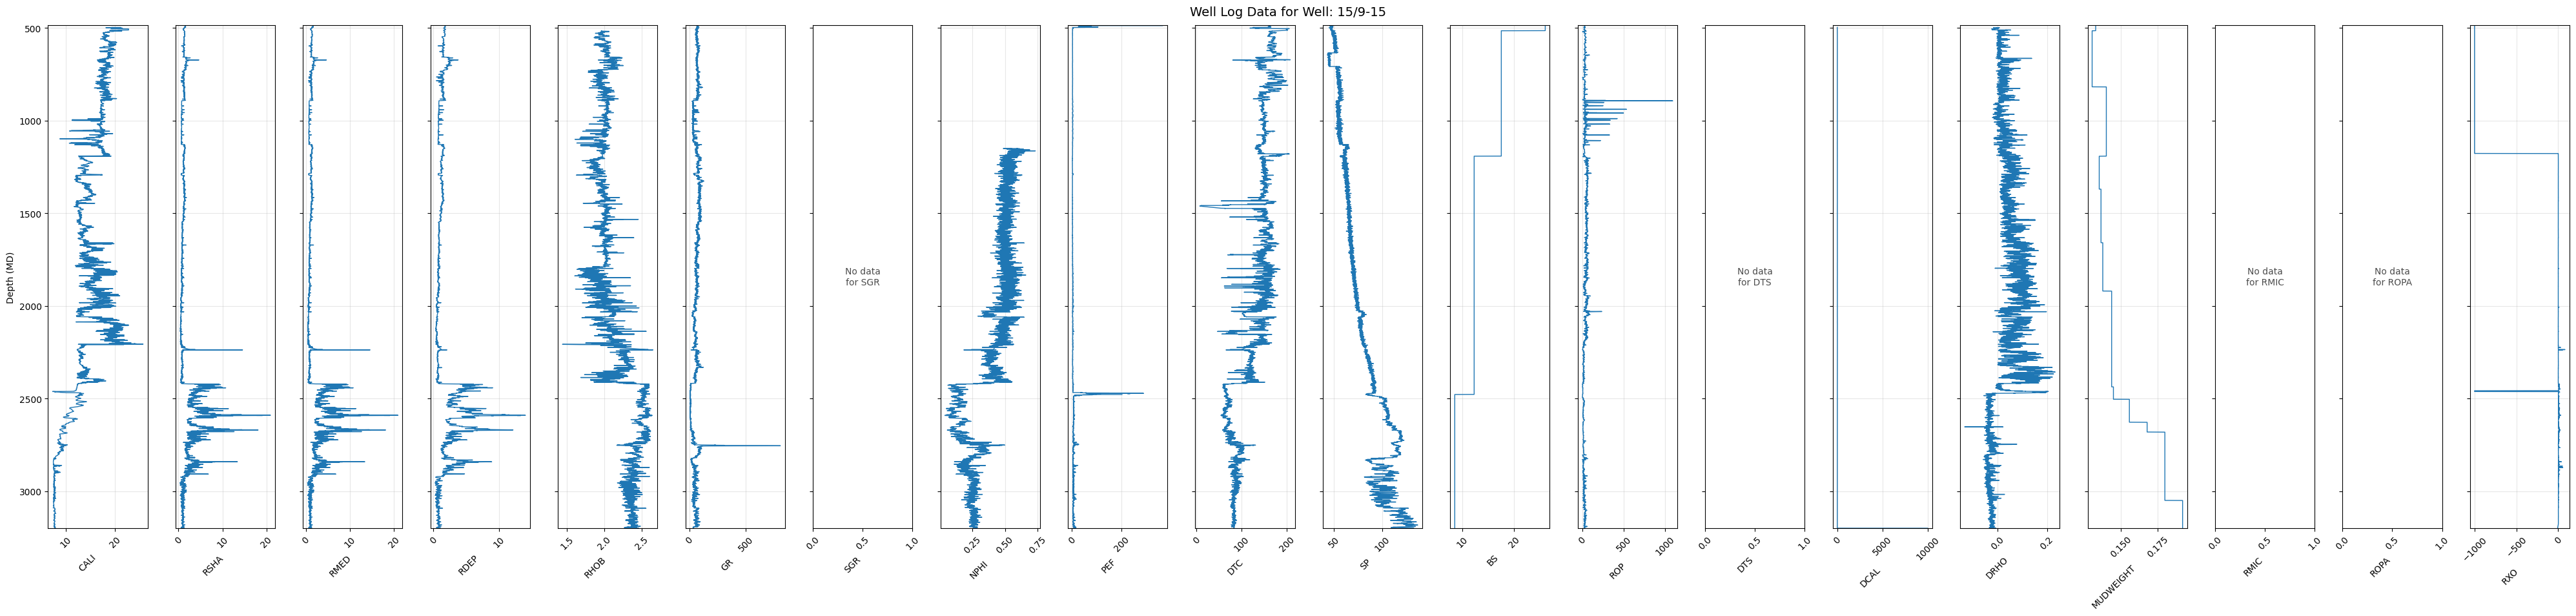

Well: 15/9-15
Depth range: 485.3 - 3200.1
Number of data points: 17717
Available parameters: 20
Parameters plotted: CALI, RSHA, RMED, RDEP, RHOB, GR, SGR, NPHI, PEF, DTC, SP, BS, ROP, DTS, DCAL, DRHO, MUDWEIGHT, RMIC, ROPA, RXO


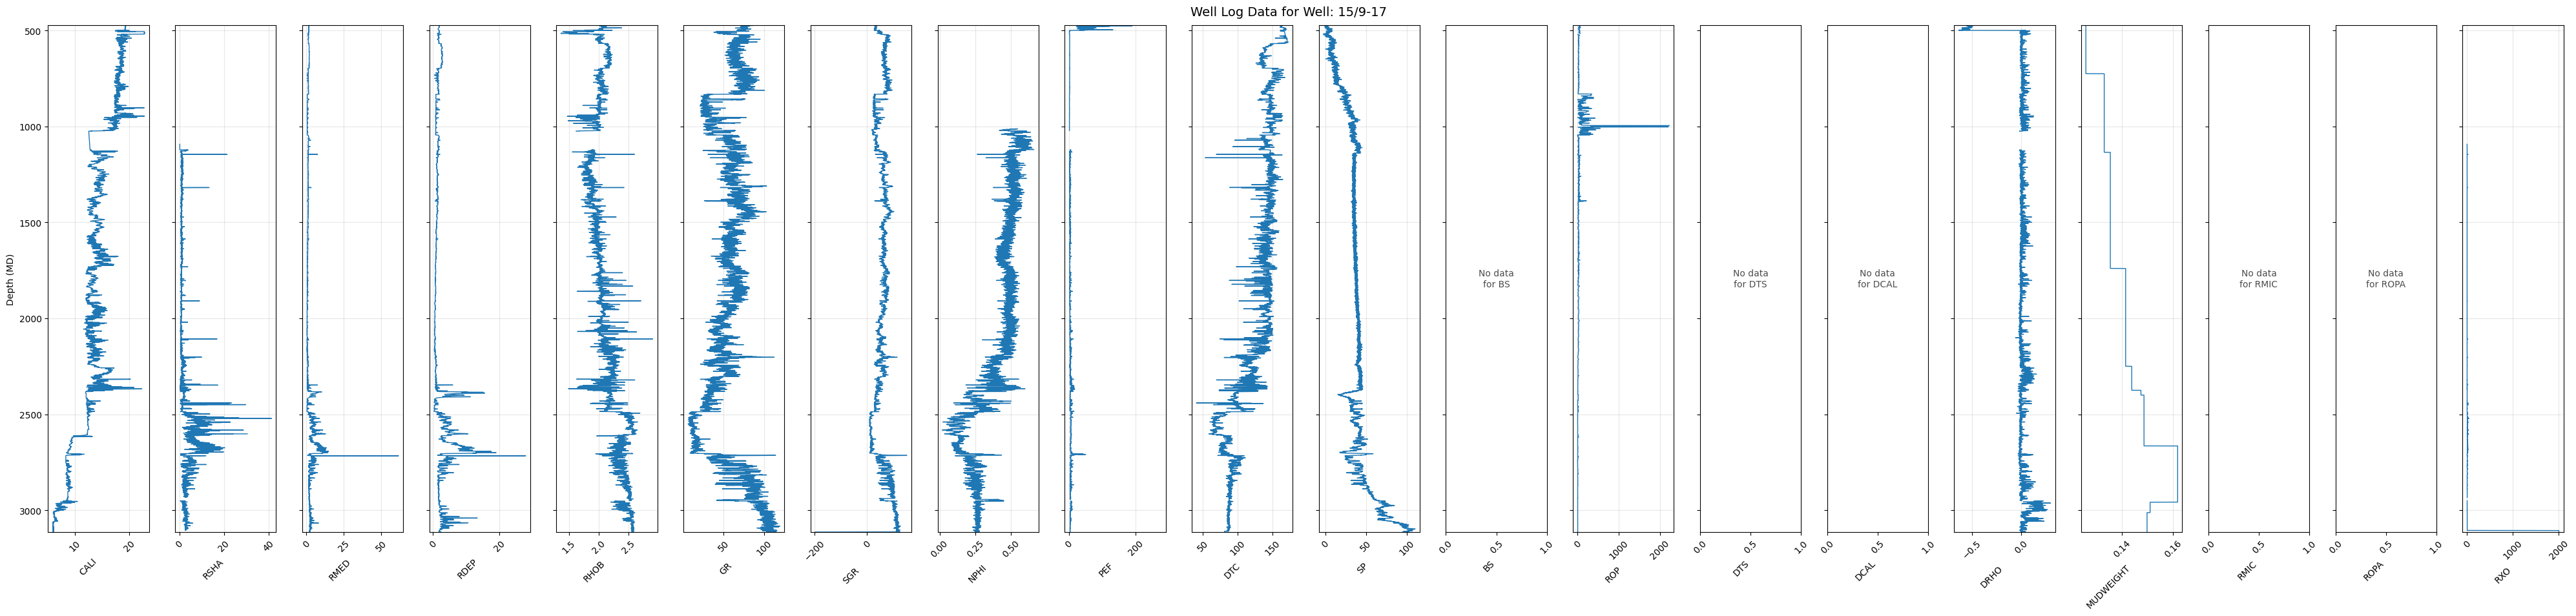

Well: 15/9-17
Depth range: 472.4 - 3114.5
Number of data points: 17350
Available parameters: 20
Parameters plotted: CALI, RSHA, RMED, RDEP, RHOB, GR, SGR, NPHI, PEF, DTC, SP, BS, ROP, DTS, DCAL, DRHO, MUDWEIGHT, RMIC, ROPA, RXO


In [23]:
# To plot multiple wells:
def plot_multiple_wells(data, well_list, figsize=(14, 10)):
    """
    Plot well logs for multiple wells.

    Parameters:
    -----------
    data : pandas.DataFrame
        The main dataset containing well data
    well_list : list
        List of well names to plot
    figsize : tuple, optional
        Figure size for each well plot
    """
    for well in well_list:
        plot_well_logs(data, well, figsize)
        print("=" * 60)  # Separator between wells

# Example usage for multiple wells:
plot_multiple_wells(data, wells[:3])  # Plot first 3 wells

In [25]:
X = data.drop(columns=['WELL', 'FORCE_2020_LITHOFACIES_LITHOLOGY', 'FORCE_2020_LITHOFACIES_CONFIDENCE'])
X.head(2)

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,RDEP,...,SP,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO
0,494.528,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.61141,1.798681,...,24.612379,NaN,34.63641,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN
1,494.680,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.61807,1.795641,...,23.895531,NaN,34.63641,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN


In [30]:
X.fillna(0, inplace=True)
# X.isna().sum()

In [32]:
y = data['FORCE_2020_LITHOFACIES_LITHOLOGY']
lithology_numbers = {30000: 0,
                 65030: 1,
                 65000: 2,
                 80000: 3,
                 74000: 4,
                 70000: 5,
                 70032: 6,
                 88000: 7,
                 86000: 8,
                 99000: 9,
                 90000: 10,
                 93000: 11}

In [33]:
y = y.map(lithology_numbers)

##### Lithologies are not equally likely. Probably smart to take this into account by computing class weights

In [34]:
np.bincount(y)

array([168937, 150455, 720803,  33329,   1688,  56320,  10513,   8213,
         1085,  15245,   3820,    103])

##### Shuffle the data

In [35]:
X, y = shuffle(X, y, random_state=42)

In [36]:
X.head(2)

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,RDEP,...,SP,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO
30423,2343.304000,436806.46875,6463010.5,-2318.007324,ROGALAND GP.,Lista Fm.,14.882113,0.77124,0.771240,0.662699,...,88.208725,12.250001,12.761565,0.000000,2.632109,0.115312,0.143792,0.000000,0.000000,0.57085
1073159,3582.467851,543919.75000,6856653.5,-3477.858154,CROMER KNOLL GP.,Roedby Fm.,8.645628,0.00000,5.599961,4.988578,...,0.000000,8.500000,10.556081,150.206314,0.000000,-0.007215,0.000000,6.627153,10.410796,0.00000


In [37]:
X.columns

Index(['DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION', 'CALI',
       'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF', 'DTC', 'SP',
       'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC', 'ROPA', 'RXO'],
      dtype='object')

#### Select only the columns you want to use

In [38]:
X = X[['DEPTH_MD', 'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'PEF', 'DTC', 'SP', 'BS']]

In [39]:
X.columns

Index(['DEPTH_MD', 'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'PEF',
       'DTC', 'SP', 'BS'],
      dtype='object')

##### Scale the features

In [40]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

##### Split into train and test data

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Applying the custom scoring function

Apart from the missing log curves, **one of the key challenges of this machine learning competition is that you are being scored using a custom scoring function**.

A prediction is scored using the penalty function
$$ S = - \frac{1}{N}\sum_{i=0}^N A_{ \hat{y}_i y_i} $$
where $N$ is the number of samples, $y_i$ is prediction for sample $i$, $\hat{y}_i$ is the true target for sample $i$, and $A$ is the penalty matrix given by the following

In short, the value of the matrix A at row i and column j is the **penalty** given by guessing lithology number i when the correct label is lithology numner j. Notice that the diagonal consists of zeros, no penalty is given for correct predictions.

In [56]:
A = np.load('/content/drive/My Drive/Academic_Research/Data/penalty_matrix.npy')
A

array([[0.   , 2.   , 3.5  , 3.   , 3.75 , 3.5  , 3.5  , 4.   , 4.   ,
        2.5  , 3.875, 3.25 ],
       [2.   , 0.   , 2.375, 2.75 , 4.   , 3.75 , 3.75 , 3.875, 4.   ,
        3.   , 3.75 , 3.   ],
       [3.5  , 2.375, 0.   , 2.   , 3.5  , 3.5  , 3.75 , 4.   , 4.   ,
        2.75 , 3.25 , 3.   ],
       [3.   , 2.75 , 2.   , 0.   , 2.5  , 2.   , 2.25 , 4.   , 4.   ,
        3.375, 3.75 , 3.25 ],
       [3.75 , 4.   , 3.5  , 2.5  , 0.   , 2.625, 2.875, 3.75 , 3.25 ,
        3.   , 4.   , 3.625],
       [3.5  , 3.75 , 3.5  , 2.   , 2.625, 0.   , 1.375, 4.   , 3.75 ,
        3.5  , 4.   , 3.625],
       [3.5  , 3.75 , 3.75 , 2.25 , 2.875, 1.375, 0.   , 4.   , 3.75 ,
        3.125, 4.   , 3.75 ],
       [4.   , 3.875, 4.   , 4.   , 3.75 , 4.   , 4.   , 0.   , 2.75 ,
        3.75 , 3.75 , 4.   ],
       [4.   , 4.   , 4.   , 4.   , 3.25 , 3.75 , 3.75 , 2.75 , 0.   ,
        4.   , 4.   , 3.875],
       [2.5  , 3.   , 2.75 , 3.375, 3.   , 3.5  , 3.125, 3.75 , 4.   ,
        0.   , 2.5  

The scoring function can be implemented as follows. If used as a loss function in a neural network framwork, it is recommended to implement a more efficient function based on tensor products.

In [44]:
def score(y_true, y_pred):
    S = 0.0
    y_true = y_true.astype(int)
    y_pred = y_pred.astype(int)
    for i in range(0, y_true.shape[0]):
        S -= A[y_true[i], y_pred[i]]
    return S/y_true.shape[0]

**IMPORTANT: The implementation above assumes zero-indexed y_true and y_pred. Be careful not to mix zero-indexed and 1-indexed class labels.**

Let us see what happens when we test the scoring function on some corner cases:

##### Lazily guessing SHALE for everything gives an OK score due to the imbalance of the dataset

In [45]:
score(y_test.values, np.ones(y_test.shape)*2)

np.float64(-1.154113253567874)

##### Doing the same for an uncommon class, like COAL, not so much..

In [46]:
score(y_test.values, np.ones(y_test.shape)*11)

np.float64(-3.0950906225037698)

##### Of course getting it completely right gives the highest possible score, 0

In [47]:
score(y_test.values, y_test.values)

np.float64(0.0)

### Example prediction on open test dataset

##### Train an oversimplified dummy model for the sake of the example
In order to give examples of how to submit predictions and reproducible code, we will train a RandomForestClassifier on the full feature set where we lazily have set all missing values (NaNs) to zero. This is an example only, following along this approach for the competition is not recommended. However, the template below can be used for generating predictions for the weekly leaderboard from your own model, and as an example on how to ecapsulate your model for final scoring where you have to submit code.

Apart from the inherent flaws of the random forest classifier, this example approach has a number of issues and simplifications. For example:
* Data is not separated per well. Normalization and shuffling is done across the whole dataset.
* The penatly matrix is not taken into account, it is treated as a normal classification problem.
* Missing logs are treated as zeros
* Depth and formation tops not taken into account
* Same model is used for when you only have gamma ray logs as when you have the full set of logs

In [48]:
model = RandomForestClassifier(n_estimators=50, random_state=42, class_weight='balanced')

In [49]:
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=50,
                       random_state=42)

In [50]:
y_pred_test = model.predict(X_test)

In [51]:
score(y_test.values, y_pred_test)

np.float64(-0.13084945515435514)

##### Save model and scaler to files

In [52]:
pickle.dump(model, open('model.pkl', 'wb'))

In [53]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In order to make it easy to run inference on new data, such as the open test dataset, it is recommended to wrap the initialization of the model, all preprocessing steps including normalization, treatment of NaNs and removals of unused columns in a class or pipeline. There are many ways of doing this, one example being a class like below:

In [54]:
class Model(object):
    def __init__(self, model_file, scaler_file):
        # Load pre-trained model from file
        self.model = pickle.load(open(model_file, 'rb'))
        # Load a "pre-trained" scaler from file
        self.scaler = pickle.load(open(scaler_file, 'rb'))

    def _preprocess(self, features):
        # Method to be run before inference. Contains things like
        # stripping unwanted columns, replacing NaNs, and scaling
        # or normalizing data
        features.fillna(0, inplace=True)
        features = features[['DEPTH_MD', 'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'PEF', 'DTC', 'SP', 'BS']]
        return self.scaler.transform(features)

    def predict(self, features):
        # This function should be able to take in features in their
        # raw, unprocessed form as read from the file test.csv and
        # return predictions as an array integers of the same length
        X = self._preprocess(features)
        return self.model.predict(X)

The model can then be initialized using persisted data in the form of saved model file (or models files), scaler files, and other persisted data.  

In [55]:
model = Model('model.pkl', 'scaler.pkl')

##### Example submission: weekly leaderboard
For the weekly leaderboard that will start September 1st, you are asked to submit predictions on the supplied open dataset in the file `test.csv`. This file contains all the columns that are in the training data except LITHOLOGY and LITHOLOGY_CONFIDENCE. Notice that the test data will also have missing columns. It is therefore important that your inference pipeline has the treatment of these missing columns as part of the pre-processing step.

In [60]:
open_test_features = pd.read_csv('/content/drive/My Drive/Academic_Research/Data/test.csv', sep=';')

In [61]:
open_test_features.head(3)

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,SP,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO
0,15/9-14,480.628001,423244.5,6461862.5,-455.624420,NORDLAND GP.,NaN,19.2031,NaN,1.613886,...,35.525719,NaN,96.461990,NaN,NaN,-0.538873,0.130611,NaN,NaN,NaN
1,15/9-14,480.780001,423244.5,6461862.5,-455.776428,NORDLAND GP.,NaN,19.2031,NaN,1.574376,...,36.158520,NaN,96.454399,NaN,NaN,-0.539232,0.130611,NaN,NaN,NaN
2,15/9-14,480.932001,423244.5,6461862.5,-455.928436,NORDLAND GP.,NaN,19.2031,NaN,1.436627,...,36.873703,NaN,96.446686,NaN,NaN,-0.540830,0.130611,NaN,NaN,NaN


In [62]:
open_test_features.columns

Index(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF',
       'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC',
       'ROPA', 'RXO'],
      dtype='object')

In [63]:
test_prediction = model.predict(open_test_features)

In [64]:
test_prediction

array([2, 2, 2, ..., 0, 0, 0])

**Important:** Before submitting we must map these predictions back to the lithology labels

In [65]:
category_to_lithology = {y:x for x,y in lithology_numbers.items()}

In [66]:
test_prediction_for_submission = np.vectorize(category_to_lithology.get)(test_prediction)

For submission to the weekly leaderboard, write the predictions as a csv file
- single column (no index column or similar)
- header: 'lithology'
- exactly the same number of rows as the raw test features
- use the original lithology labels, 65000, 30000, ..., NOT the encoded ones 0, 1, 2, ...

Example:
```
# lithology
65000
65000
30000
30000
30000
30000
30000
65030
65030
65030
.
.
.
```

In [67]:
test_prediction_for_submission

array([65000, 65000, 65000, ..., 30000, 30000, 30000])

In [68]:
np.savetxt('test_predictions.csv', test_prediction_for_submission, header='lithology', fmt='%i')

### Submitting code for final scoring
At the end of the competition, the highest performing teams are invited to submit code for blind scoring on a hidden test dataset. The winner will be the team with the best score on the hidden test dataset, not the weekly leaderboard. In order to do this, you must submit the following in a zip-file:
* Code to do the inference
* Any persisted data in the form of pre-trained model or models, scalers, and more
* Information about your environment

There are many ways of doing this. In the example above, the code to do the inference would be the `Model` class in a python-file, the persisted data would be the files `model.pkl` and `scaler.pkl`.

Your python environment needs to be replicable by the judges of the competition. There are many ways of doing this. Examples include dumping pip package versions to a file

In [69]:
!pip freeze > requirements.txt

If you are using Anaconda, then you can export an envionment file as follows

In [ ]:
!conda env export > environment.yml

Other options include `Docker`, `pipenv` and many more.